<h1>Stats Forecast Time Series Forecasting </h1>
By Edwin Tembo - 2023 <br>
Source : https://github.com/Nixtla/statsforecast

In [ ]:
!pip install statsforecast -U

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
try:
  del df
except:
  pass
tickers = ['SPY', 'MSFT', 'AAPL', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'META', 'NKE', 'NFLX']
df = yf.download(tickers, start = '2018-01-01', end = '2023-11-24', interval='1mo') # use monthly prices
df.head()

[*********************100%%**********************]  10 of 10 completed


Adj Close                                               \
                 AAPL       AMZN       GOOG        META       MSFT   
Date                                                                 
2018-01-01  39.581059  72.544502  58.497002  186.889999  88.685959   
2018-02-01  42.108189  75.622498  55.236500  178.320007  87.528488   
2018-03-01  39.825497  72.366997  51.589500  159.789993  85.595093   
2018-04-01  39.227333  78.306503  50.866501  172.000000  87.705193   
2018-05-01  44.356842  81.481003  54.249500  191.779999  92.694420   

                                                                     ...  \
                  NFLX        NKE       NVDA         SPY       TSLA  ...   
Date                                                                 ...   
2018-01-01  270.299988  64.317032  60.808369  255.980591  23.620667  ...   
2018-02-01  291.380005  63.195122  59.868298  246.672974  22.870667  ...   
2018-03-01  295.350006  62.638874  57.328571  238.954529  17.742001  ...   
2018-04-01  312.459991  64.672340  55.672508  241.151489  19.593332  ...   
2018-05-01  351.600006  67.896965  62.427982  247.013657  18.982000  ...   

                Volume                                               \
                  AAPL        AMZN       GOOG       META       MSFT   
Date                                                                  
2018-01-01  2638717600  1927424000  574768000  495655700  574258400   
2018-02-01  3711577200  2755680000  847640000  516251600  725663300   
2018-03-01  2854910800  2608002000  907066000  996201700  750754800   
2018-04-01  2664617200  2598392000  834318000  750072700  668130700   
2018-05-01  2483905200  1432310000  636988000  401144100  509417900   

                                                                      
                 NFLX        NKE        NVDA         SPY        TSLA  
Date                                                                  
2018-01-01  238377600  157812200  1145621600  1985506700  1864072500  
2018-02-01  184585800  160317000  1491552800  2923722000  1637850000  
2018-03-01  263449400  174066700  1411844000  2323561800  2359027500  
2018-04-01  262006000  158981900  1114400800  1998466500  2854662000  
2018-05-01  142050800  129566300  1197824000  1606397200  2333671500  

[5 rows x 60 columns]

In [ ]:
df = df.loc[:, (['Adj Close'], tickers)]
df

Adj Close                                                  \
                   SPY        MSFT        AAPL        GOOG        AMZN   
Date                                                                     
2018-01-01  255.980591   88.685959   39.581059   58.497002   72.544502   
2018-02-01  246.672974   87.528488   42.108189   55.236500   75.622498   
2018-03-01  238.954529   85.595093   39.825497   51.589500   72.366997   
2018-04-01  241.151489   87.705193   39.227333   50.866501   78.306503   
2018-05-01  247.013657   92.694420   44.356842   54.249500   81.481003   
...                ...         ...         ...         ...         ...   
2023-07-01  456.180908  334.531311  195.926956  133.110001  133.679993   
2023-08-01  448.767059  326.405060  187.369797  137.350006  138.009995   
2023-09-01  425.977448  315.110443  170.984741  131.850006  127.120003   
2023-10-01  418.200012  337.425140  170.545319  125.300003  133.089996   
2023-11-01  455.019989  377.084656  191.058289  140.020004  146.710007   

                                                                        
                  TSLA        NVDA        META         NKE        NFLX  
Date                                                                    
2018-01-01   23.620667   60.808369  186.889999   64.317032  270.299988  
2018-02-01   22.870667   59.868298  178.320007   63.195122  291.380005  
2018-03-01   17.742001   57.328571  159.789993   62.638874  295.350006  
2018-04-01   19.593332   55.672508  172.000000   64.672340  312.459991  
2018-05-01   18.982000   62.427982  191.779999   67.896965  351.600006  
...                ...         ...         ...         ...         ...  
2023-07-01  267.429993  467.251526  318.600006  110.020981  438.970001  
2023-08-01  258.079987  493.509338  295.890015  101.369995  433.679993  
2023-09-01  250.220001  434.954163  300.209991   95.300354  377.600006  
2023-10-01  200.839996  407.799988  301.269989  102.769997  411.690002  
2023-11-01  234.210007  487.160004  341.489990  107.919998  478.000000  

[71 rows x 10 columns]

In [ ]:
df = df.loc[:, (['Adj Close'], tickers)]
df.columns = df.columns.droplevel() # drop MultiIndex
df = df.reset_index()
df.head()

,Date,SPY,MSFT,AAPL,GOOG,AMZN,TSLA,NVDA,META,NKE,NFLX
0,2018-01-01,255.980591,88.685959,39.581059,58.497002,72.544502,23.620667,60.808369,186.889999,64.317032,270.299988
1,2018-02-01,246.672974,87.528488,42.108189,55.236500,75.622498,22.870667,59.868298,178.320007,63.195122,291.380005
2,2018-03-01,238.954529,85.595093,39.825497,51.589500,72.366997,17.742001,57.328571,159.789993,62.638874,295.350006
3,2018-04-01,241.151489,87.705193,39.227333,50.866501,78.306503,19.593332,55.672508,172.000000,64.672340,312.459991
4,2018-05-01,247.013657,92.694420,44.356842,54.249500,81.481003,18.982000,62.427982,191.779999,67.896965,351.600006


In [ ]:
prices = df.melt(id_vars = 'Date')
prices = prices.rename(columns={'Date': 'ds', 'variable': 'unique_id', 'value': 'y'})
prices = prices[['unique_id', 'ds', 'y']]
prices

,unique_id,ds,y
0,SPY,2018-01-01,255.980591
1,SPY,2018-02-01,246.672974
2,SPY,2018-03-01,238.954529
3,SPY,2018-04-01,241.151489
4,SPY,2018-05-01,247.013657
...,...,...,...
705,NFLX,2023-07-01,438.970001
706,NFLX,2023-08-01,433.679993
707,NFLX,2023-09-01,377.600006
708,NFLX,2023-10-01,411.690002


In [ ]:
from statsforecast import StatsForecast

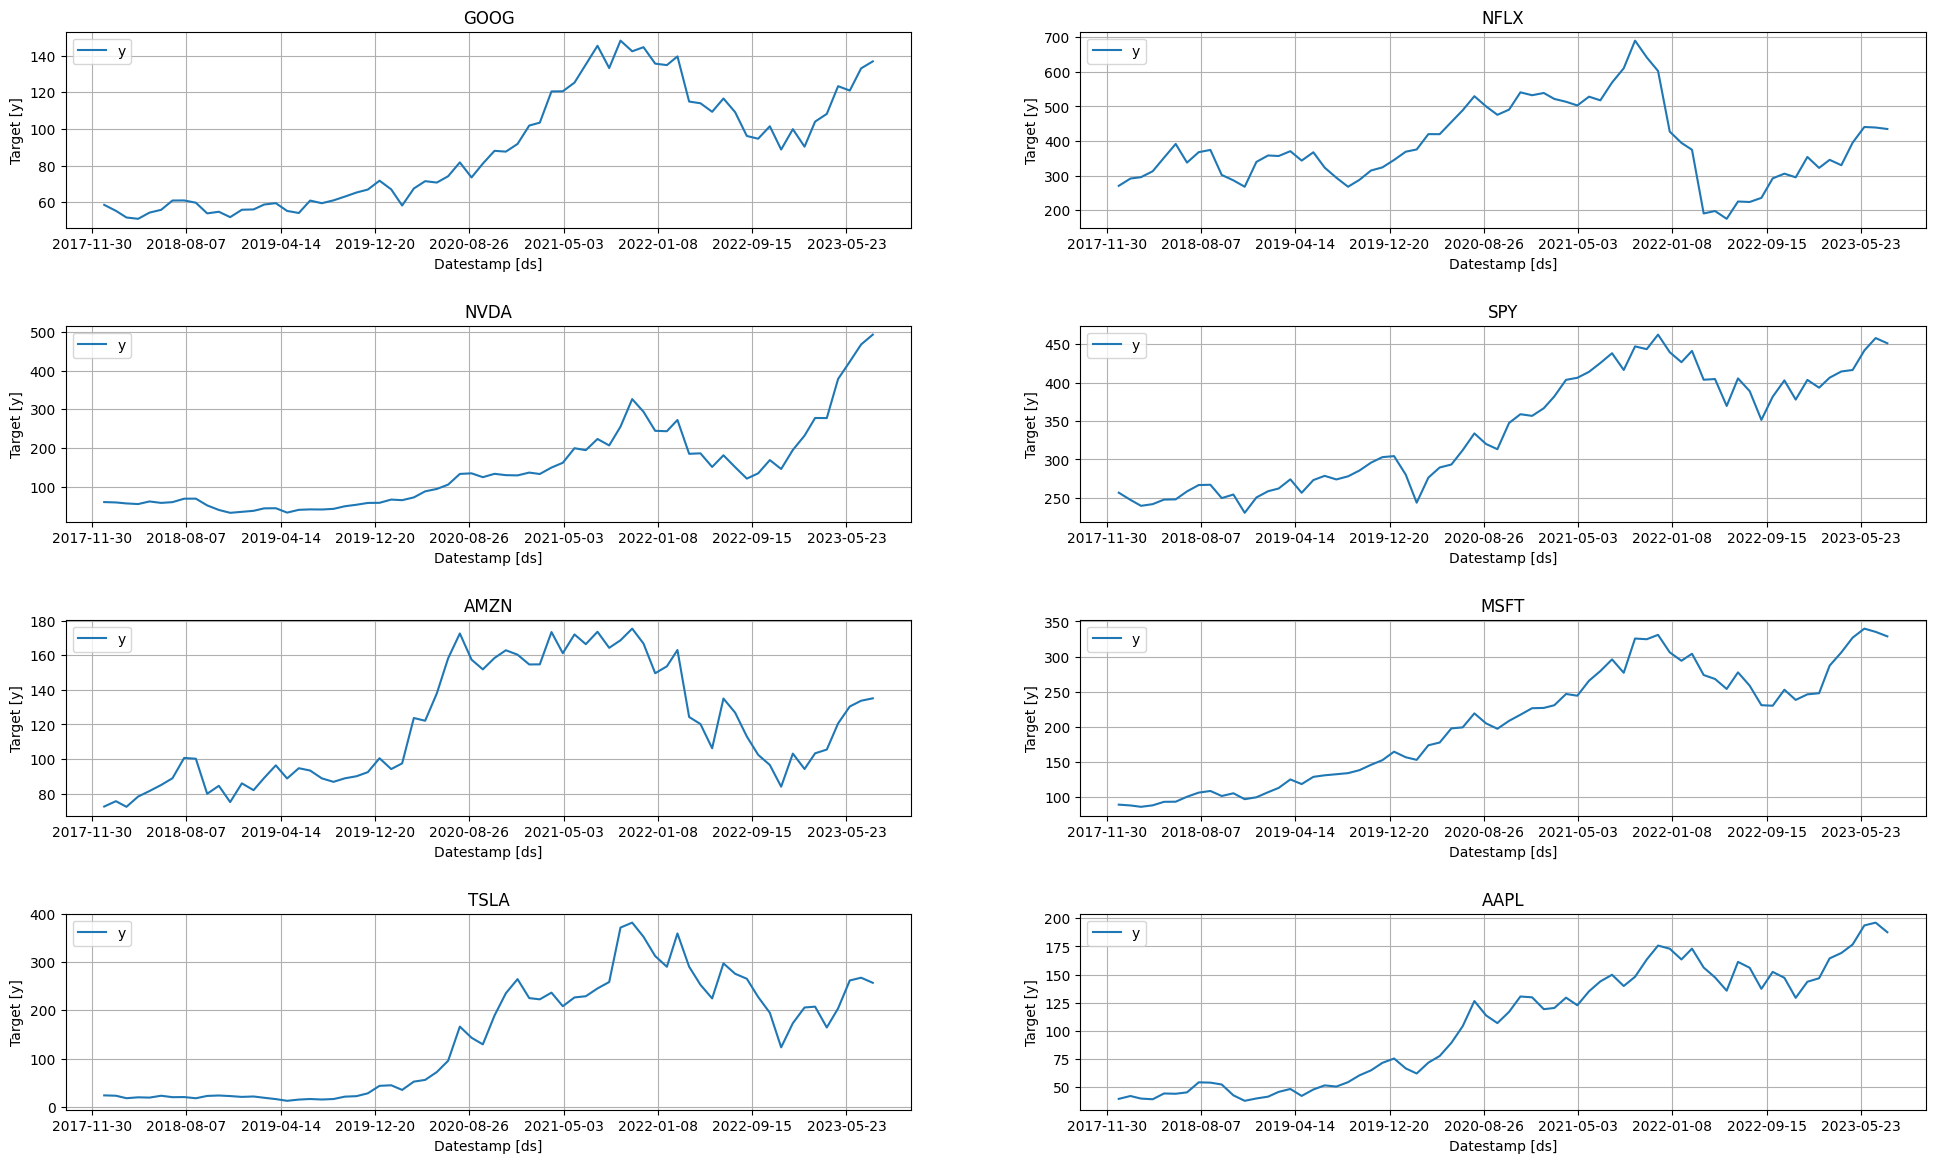

In [ ]:
StatsForecast.plot(prices)

In [ ]:
import numpy as np
## get the returns by dividing the current price by the previous timestep's price
prices['rt'] = prices['y'].div(prices.groupby('unique_id')['y'].shift(1))
prices['rt'] = np.log(prices['rt'])

returns = prices[['unique_id', 'ds', 'rt']]
returns = returns.rename(columns={'rt':'y'})
returns

,unique_id,ds,y
0,SPY,2018-01-01,NaN
1,SPY,2018-02-01,-0.037038
2,SPY,2018-03-01,-0.031790
3,SPY,2018-04-01,0.009152
4,SPY,2018-05-01,0.024018
...,...,...,...
675,NFLX,2023-04-01,-0.046054
676,NFLX,2023-05-01,0.180587
677,NFLX,2023-06-01,0.108420
678,NFLX,2023-07-01,-0.003457


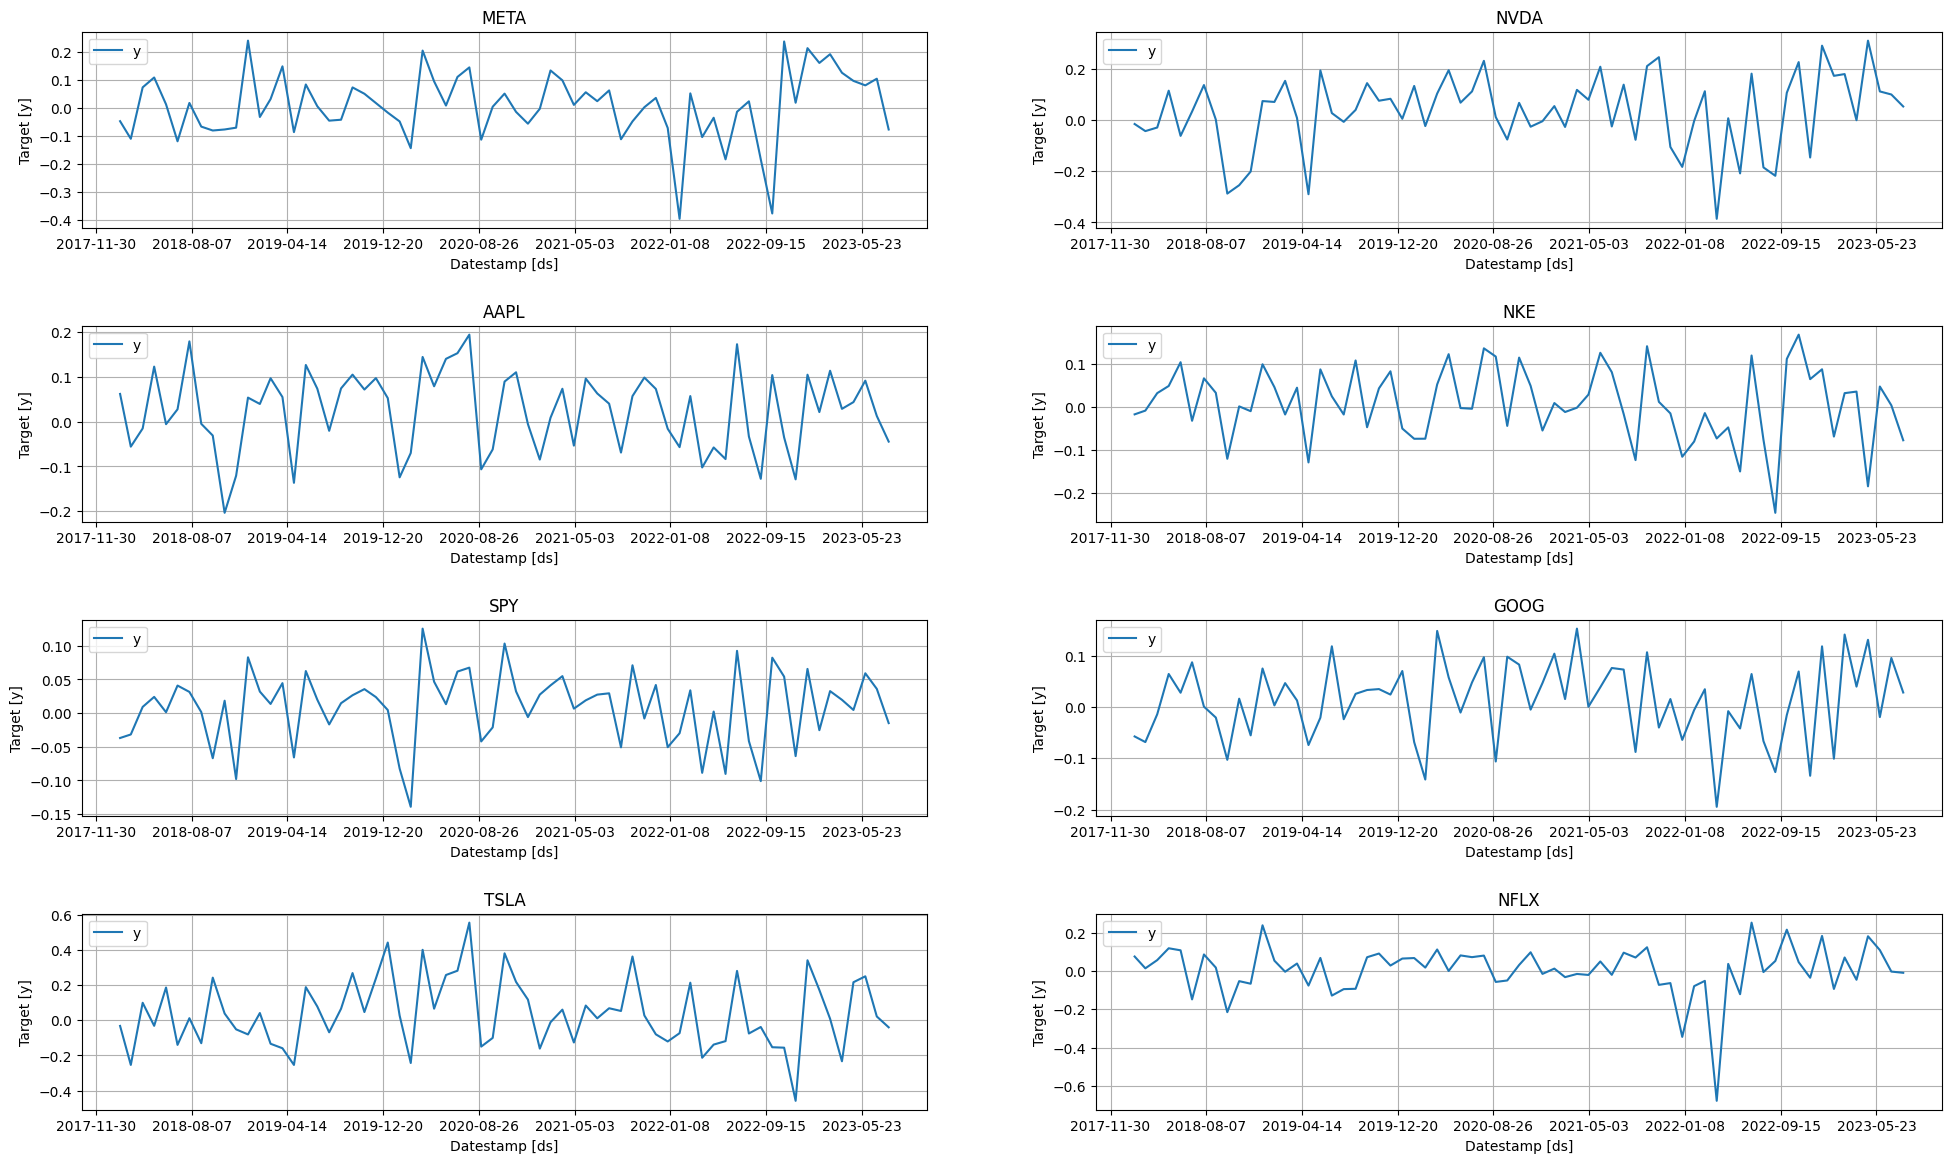

In [ ]:
StatsForecast.plot(returns)

In [ ]:
from statsforecast.models import (
    GARCH,
    ARCH,
    Naive
)

models = [ARCH(1),
          ARCH(2),
          GARCH(1,1),
          GARCH(1,2),
          GARCH(2,2),
          GARCH(2,1),
          Naive()
]

In [ ]:
sf = StatsForecast(
    df = returns, # data_df
    models = models,
    freq = 'MS',  ## pandas frequency option
    n_jobs = -1   ## all cores
)

In [ ]:
###How the model would have worked in the past

crossvalidation_df = sf.cross_validation(
    df = returns,
    h = 3,         ## steps into the future
    step_size = 3, # step size for each window
    n_windows = 4  ## windows used for forecasting i.e. 4 windows into teh past
  )

In [ ]:
crossvalidation_df = crossvalidation_df.reset_index()
crossvalidation_df.rename(columns = {'y' : 'actual'}, inplace = True)
crossvalidation_df.head()

,unique_id,ds,cutoff,actual,ARCH(1),ARCH(2),"GARCH(1,1)","GARCH(1,2)","GARCH(2,2)","GARCH(2,1)",Naive
0,AAPL,2022-09-01,2022-08-01,-0.127556,0.142790,0.144421,0.149154,0.143412,0.143409,0.151502,-0.033093
1,AAPL,2022-10-01,2022-08-01,0.103956,-0.056732,-0.056903,-0.057339,-0.060131,-0.060120,-0.057229,-0.033093
2,AAPL,2022-11-01,2022-08-01,-0.035243,-0.046717,-0.047200,-0.048679,-0.046650,-0.046649,-0.049115,-0.033093
3,AAPL,2022-12-01,2022-11-01,-0.128762,0.145522,0.147178,0.149369,0.149533,0.149536,0.154728,-0.035243
4,AAPL,2023-01-01,2022-11-01,0.104829,-0.056580,-0.056558,-0.057416,-0.058347,-0.058347,-0.054993,-0.035243


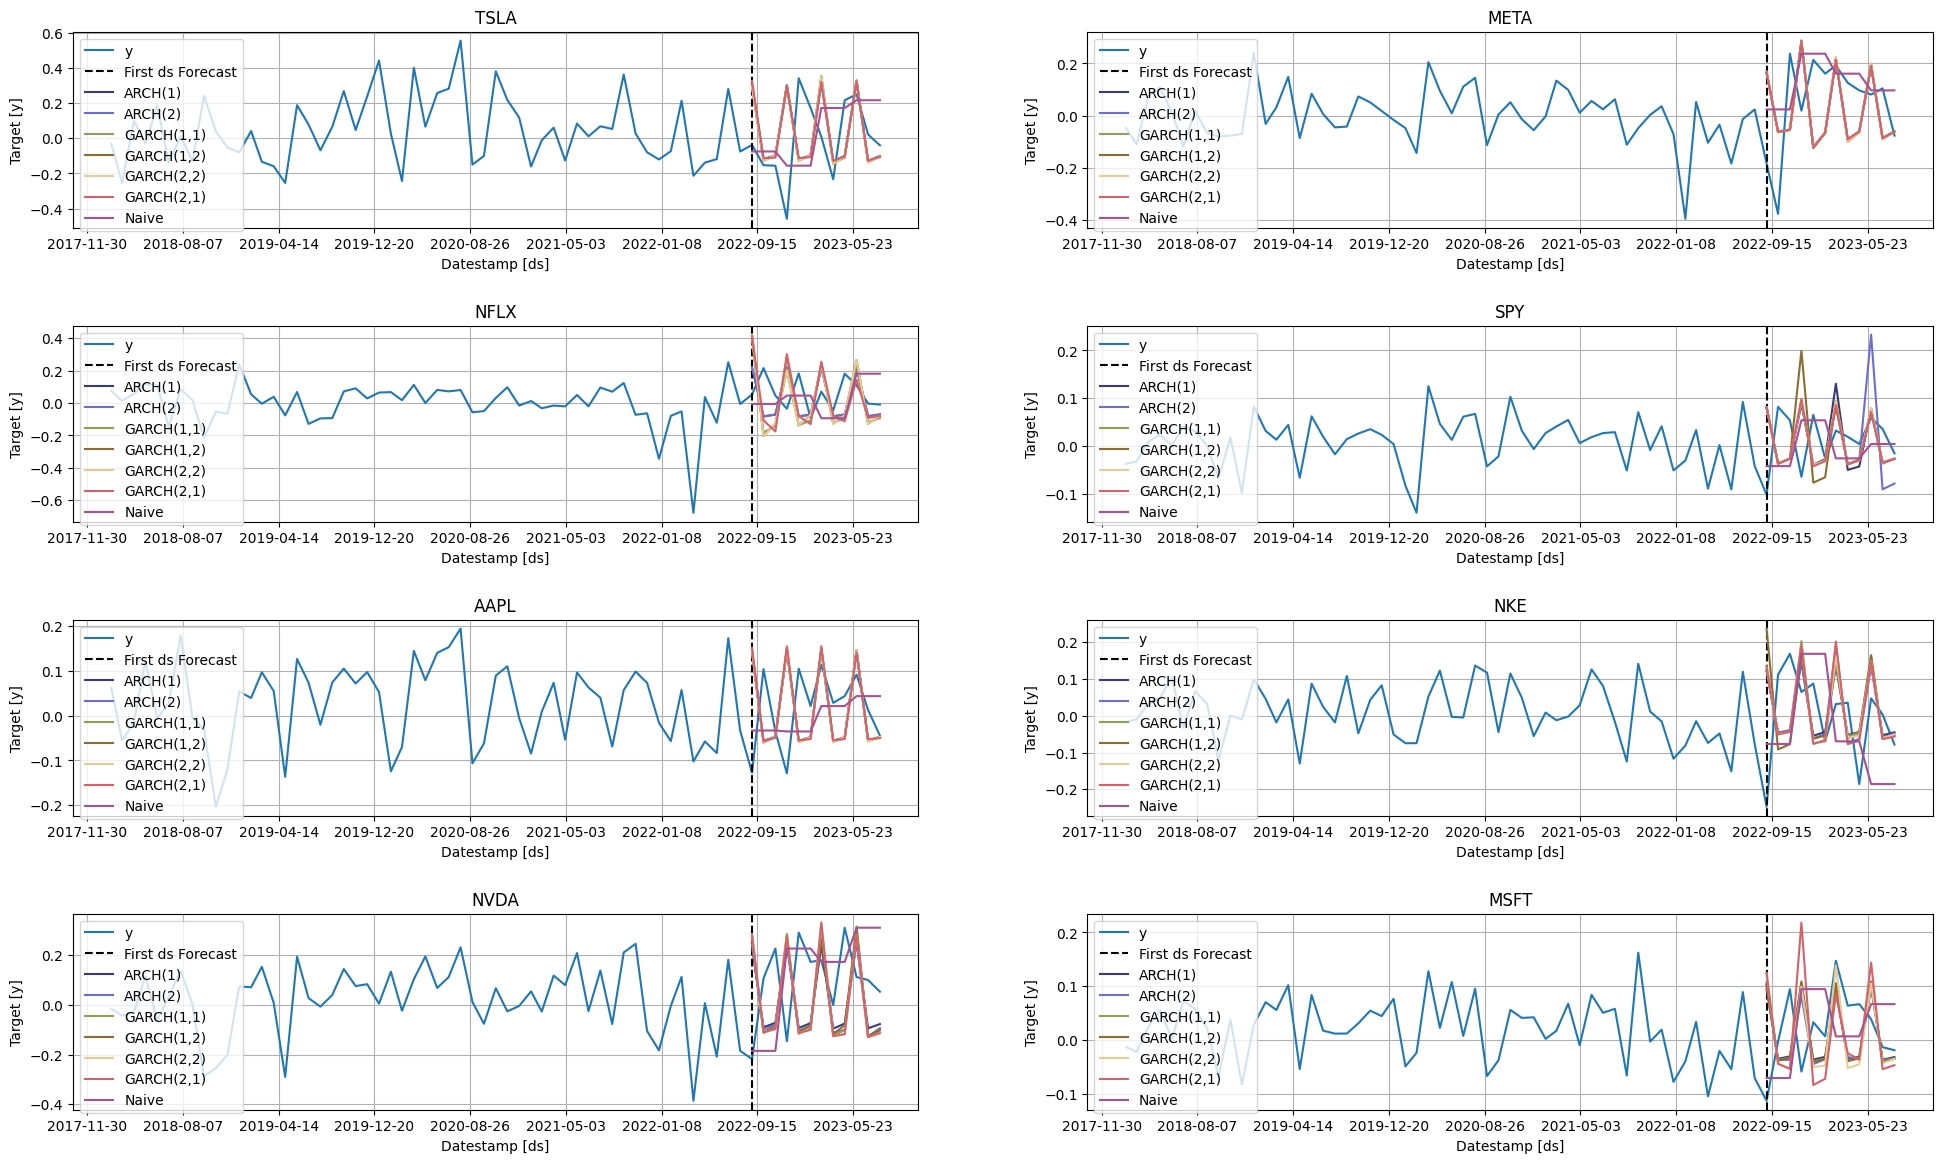

In [ ]:
StatsForecast.plot(returns, crossvalidation_df.drop(['cutoff', 'actual'], axis=1))

In [ ]:
pip install datasetsforecast -U

In [ ]:
from datasetsforecast.losses import mae
def compute_cv_mae(crossvalidation_df):
    """Compute MAE for all models generated"""
    res = {}
    for mod in models:
        res[mod] = mae(crossvalidation_df['actual'], crossvalidation_df[str(mod)])
    return pd.Series(res)

In [ ]:
mae_cv = crossvalidation_df.groupby(['unique_id', 'cutoff']).apply(compute_cv_mae)

mae = mae_cv.groupby('unique_id').mean()
mae.style.highlight_min(color = 'lightblue', axis = 1)

,ARCH(1),ARCH(2),"GARCH(1,1)","GARCH(1,2)","GARCH(2,2)","GARCH(2,1)",Naive
unique_id,,,,,,,
AAPL,0.106789,0.107434,0.108635,0.108265,0.108265,0.109308,0.067710
AMZN,0.121872,0.127387,0.127252,0.132038,0.147436,0.147443,0.106048
GOOG,0.123728,0.123772,0.123797,0.137648,0.151115,0.123939,0.131010
META,0.208151,0.207459,0.208423,0.210398,0.210400,0.207459,0.122169
MSFT,0.081253,0.083678,0.084278,0.085268,0.089488,0.110772,0.085954
NFLX,0.150357,0.151019,0.202537,0.199644,0.199643,0.187220,0.135063
NKE,0.125258,0.130031,0.134395,0.146745,0.132789,0.136318,0.156569
NVDA,0.248059,0.264978,0.282747,0.271352,0.284315,0.284248,0.184131
SPY,0.079461,0.095768,0.073587,0.090077,0.075660,0.074656,0.060562


In [ ]:
levels = [80, 95] # confidence levels for the prediction intervals

forecasts = sf.forecast(h=3, level=levels)
forecasts = forecasts.reset_index()
forecasts.head()

,unique_id,ds,ARCH(1),ARCH(1)-lo-95,ARCH(1)-lo-80,ARCH(1)-hi-80,ARCH(1)-hi-95,ARCH(2),ARCH(2)-lo-95,ARCH(2)-lo-80,...,"GARCH(2,1)","GARCH(2,1)-lo-95","GARCH(2,1)-lo-80","GARCH(2,1)-hi-80","GARCH(2,1)-hi-95",Naive,Naive-lo-80,Naive-lo-95,Naive-hi-80,Naive-hi-95
0,AAPL,2023-09-01,0.142779,0.127635,0.132877,0.152680,0.157922,0.142102,0.127102,0.132294,...,0.133104,0.119943,0.124499,0.141709,0.146265,-0.044480,-0.197896,-0.279110,0.108936,0.190150
1,AAPL,2023-10-01,-0.054834,-0.070580,-0.065130,-0.044538,-0.039087,-0.054150,-0.069506,-0.064190,...,-0.049755,-0.062720,-0.058233,-0.041278,-0.036790,-0.044480,-0.261443,-0.376297,0.172483,0.287337
2,AAPL,2023-11-01,-0.046478,-0.061654,-0.056401,-0.036554,-0.031301,-0.047872,-0.063974,-0.058400,...,-0.049221,-0.066243,-0.060351,-0.038091,-0.032200,-0.044480,-0.310205,-0.450871,0.221245,0.361911
3,AMZN,2023-09-01,0.153229,0.135788,0.141824,0.164633,0.170669,0.147739,0.131525,0.137137,...,0.137952,0.123816,0.128709,0.147196,0.152089,0.010344,-0.173786,-0.271259,0.194475,0.291948
4,AMZN,2023-10-01,-0.057709,-0.075149,-0.069113,-0.046304,-0.040268,-0.055488,-0.071612,-0.066031,...,-0.048001,-0.060068,-0.055891,-0.040111,-0.035934,0.010344,-0.250055,-0.387903,0.270744,0.408591


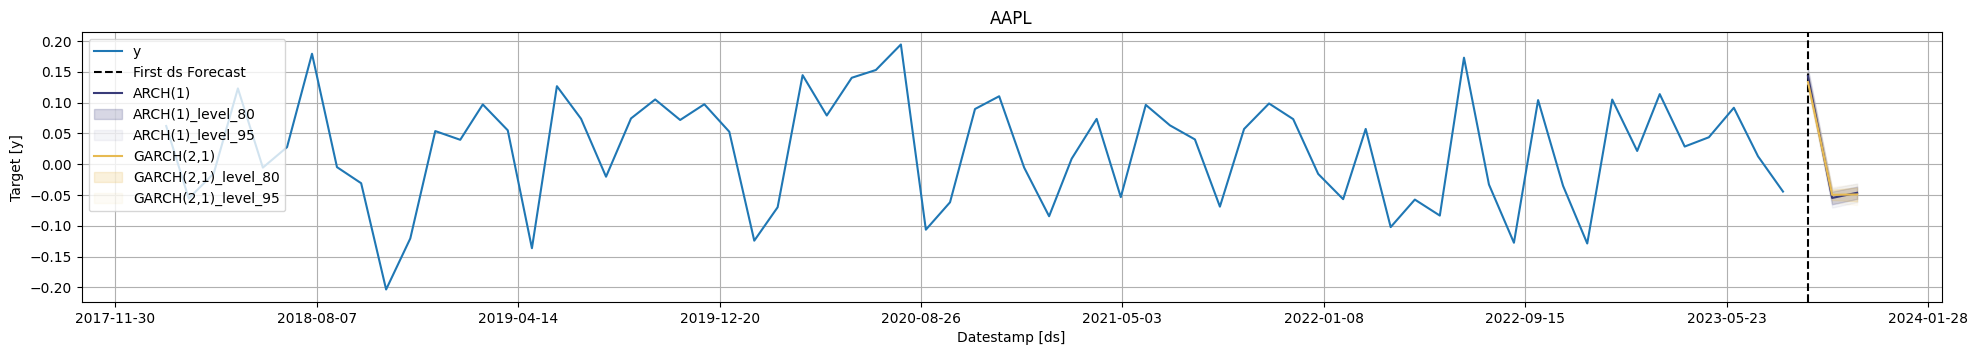

In [ ]:
StatsForecast.plot(returns, forecasts, level=levels, unique_ids = ['AAPL'], models = ['ARCH(1)','GARCH(2,1)'])